Machine Learning Hyperparameter Tuning: Given a machine learning model and a set of hyperparameters, determine the optimal values for the hyperparameters that maximize the model's accuracy on a validation set

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = load_breast_cancer()

In [3]:
X=data.data
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y=data.target
y=pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y[0], test_size=0.2)
print('X train shape:',X_train.shape)
print('X val shape:',X_val.shape)
print('y train shape:',y_train.shape)
print('y val shape:',y_val.shape)

X train shape: (455, 30)
X val shape: (114, 30)
y train shape: (455,)
y val shape: (114,)


In [6]:
def objective_function(params):
    fx = []
    if len(params)>2:
        for i in range (len(params)):
            c = params[i,0]
            gamma = params[i,1]
            model = SVC(C=c, gamma=gamma, kernel='rbf')
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            fx.append(accuracy_score(y_val, y_pred))
        return fx
    else:
        model = SVC(C=params[0], gamma=params[1], kernel='rbf')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        fx.append(accuracy_score(y_val, y_pred))
        return y_pred,fx

In [7]:
bounds_parameters = [(0.1, 10.0), (0.0001, 1.0)]

In [8]:
w = 0.9
c1 =c2= 1.5
max_opt_iter=200
D=2
size=20

In [9]:
x=np.zeros((size,D))
for i in range(size):
    for c in range(D):
        if c==0:
            m=bounds_parameters[0][0]+random.random()*(bounds_parameters[0][1]-bounds_parameters[0][0])
            if m>bounds_parameters[0][1]:
                x[i,c]=bounds_parameters[0][1]
            elif m<bounds_parameters[0][0]:
                x[i,c]=bounds_parameters[0][0]
            else:
                x[i,c]=m
        else:
            m=bounds_parameters[1][0]+random.random()*(bounds_parameters[1][1]-bounds_parameters[1][0])
            if m>bounds_parameters[1][1]:
                x[i,c]=bounds_parameters[1][1]
            elif m<bounds_parameters[1][0]:
                x[i,c]=bounds_parameters[1][0]
            else:
                x[i,c]=m 
x

array([[2.39849806e+00, 6.86207159e-01],
       [6.92579843e+00, 3.31603455e-01],
       [2.10206579e+00, 7.52781560e-01],
       [1.24801147e+00, 2.06154519e-01],
       [6.17968053e+00, 6.22933485e-01],
       [5.09199637e+00, 6.46335754e-01],
       [2.41716452e+00, 9.02361826e-01],
       [6.67722445e+00, 5.17038717e-01],
       [3.93601275e+00, 9.24148580e-01],
       [8.76239718e+00, 8.89499876e-01],
       [3.92329940e+00, 4.53930075e-01],
       [2.13024730e+00, 3.08537959e-01],
       [2.60293305e+00, 4.90032718e-03],
       [7.34364673e+00, 5.75694837e-01],
       [1.70867453e+00, 5.49399984e-01],
       [5.82141434e-01, 7.23927573e-01],
       [7.09019340e+00, 1.67788061e-01],
       [4.69432112e+00, 5.48133911e-02],
       [5.15409677e+00, 8.57053496e-01],
       [4.18375369e+00, 6.58351845e-01]])

In [10]:
v=np.zeros((size,D))
for i in range(size):
    for c in range(D):
        v[i,c]=random.random()
v

array([[0.95341368, 0.34301759],
       [0.09850029, 0.05496607],
       [0.00761977, 0.09610122],
       [0.14890519, 0.86996348],
       [0.79533998, 0.57616393],
       [0.17244138, 0.37634674],
       [0.21372941, 0.42365826],
       [0.08515269, 0.75362974],
       [0.4390796 , 0.62242448],
       [0.32872751, 0.36691125],
       [0.10800702, 0.99069175],
       [0.31704588, 0.52928293],
       [0.06889823, 0.88913901],
       [0.05838639, 0.50014165],
       [0.79600514, 0.89976241],
       [0.92282435, 0.27572346],
       [0.25989668, 0.50722131],
       [0.11834402, 0.52771704],
       [0.80343197, 0.20086374],
       [0.41246363, 0.68424629]])

In [11]:
fx=objective_function(x)
fx

[0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.9210526315789473,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824,
 0.6403508771929824]

In [12]:
pbest=x
pbest

array([[2.39849806e+00, 6.86207159e-01],
       [6.92579843e+00, 3.31603455e-01],
       [2.10206579e+00, 7.52781560e-01],
       [1.24801147e+00, 2.06154519e-01],
       [6.17968053e+00, 6.22933485e-01],
       [5.09199637e+00, 6.46335754e-01],
       [2.41716452e+00, 9.02361826e-01],
       [6.67722445e+00, 5.17038717e-01],
       [3.93601275e+00, 9.24148580e-01],
       [8.76239718e+00, 8.89499876e-01],
       [3.92329940e+00, 4.53930075e-01],
       [2.13024730e+00, 3.08537959e-01],
       [2.60293305e+00, 4.90032718e-03],
       [7.34364673e+00, 5.75694837e-01],
       [1.70867453e+00, 5.49399984e-01],
       [5.82141434e-01, 7.23927573e-01],
       [7.09019340e+00, 1.67788061e-01],
       [4.69432112e+00, 5.48133911e-02],
       [5.15409677e+00, 8.57053496e-01],
       [4.18375369e+00, 6.58351845e-01]])

In [13]:
index=np.argmax(fx)
gbest_value=fx[index]
gbest=x[index]
gbest_value

0.9210526315789473

In [14]:
gbest

array([2.60293305, 0.00490033])

In [15]:
error=.000001
f=fx.copy()
for i in range(1,max_opt_iter):
    g=gbest_value.copy()
    for c in range(size):
        for j in range(D):
            r1=random.random()
            r2=random.random()
            v[c,j]=w*v[c,j]+c1*r1*(pbest[c,j]-x[c,j])+c2*r2*(gbest[j]-x[c,j])
            m=v[c,j]+x[c,j]
            if j==0:
                if m>bounds_parameters[0][1]:
                    x[c,j]=bounds_parameters[0][1]
                elif m<bounds_parameters[0][0]:
                    x[c,j]=bounds_parameters[0][0]
                else:
                    x[c,j]=m
            if j==1:
                if m>bounds_parameters[1][1]:
                    x[c,j]=bounds_parameters[1][1]
                elif m<bounds_parameters[1][0]:
                    x[c,j]=bounds_parameters[1][0]
                else:
                    x[c,j]=m        
                    
    fx=objective_function(x)
    for o in range(size):
        if f[o]<fx[o]:
            f[o]=fx[o]
            pbest[o,:]=x[o,:]
    index=np.argmax(fx)
    if fx[index]==g or abs(fx[index]-g) ==error:
        print('prv value is:',fx[index],' current value is:',g)
        break
    elif fx[index] <g:
        continue
    gbest_value=fx[index]    
    gbest=x[index]
    print('iteration #',i)
    print('v \n',v)
    print('x \n',x)
    print('gbest = ',gbest_value)
    print('gb \n ',gbest)

iteration # 1
v 
 [[ 1.08050376  0.11720928]
 [-0.39845357 -0.12188945]
 [ 0.7155762  -0.91299754]
 [ 0.48289132  0.60800144]
 [-1.24417154  0.27176661]
 [-0.27582875  0.29944244]
 [ 0.35688637  0.13015457]
 [-5.94275453  0.33771802]
 [-1.6009192  -0.24078294]
 [-1.09842203 -0.00994658]
 [-1.79031504  0.40557211]
 [ 0.63893536  0.15143247]
 [ 0.06200841  0.80022511]
 [-1.80415207  0.57004913]
 [ 0.87565553  0.9138872 ]
 [ 3.40914307  0.33438649]
 [-1.51170561  0.75982628]
 [-2.71584555  0.86334993]
 [-1.76016153  0.11650714]
 [-1.5919018   0.80746997]]
x 
 [[3.47900182e+00 8.03416442e-01]
 [6.52734486e+00 2.09714003e-01]
 [2.81764199e+00 1.00000000e-04]
 [1.73090278e+00 8.14155959e-01]
 [4.93550899e+00 8.94700093e-01]
 [4.81616762e+00 9.45778194e-01]
 [2.77405089e+00 1.00000000e+00]
 [7.34469919e-01 8.54756739e-01]
 [2.33509355e+00 6.83365636e-01]
 [7.66397516e+00 8.79553293e-01]
 [2.13298436e+00 8.59502189e-01]
 [2.76918267e+00 4.59970434e-01]
 [2.66494146e+00 8.05125439e-01]
 [5.5394

In [16]:
gbest_value

0.9385964912280702

In [17]:
gbest

array([3.46166058e+00, 1.00000000e-04])

In [18]:
pbest

array([[4.43675073e+00, 3.39867453e-01],
       [3.92264995e+00, 1.00000000e-04],
       [3.46166058e+00, 1.00000000e-04],
       [3.14398295e+00, 4.49833933e-01],
       [1.98022063e+00, 2.76398298e-01],
       [4.38553172e+00, 1.00000000e+00],
       [3.61417447e+00, 8.43319484e-01],
       [1.00000000e-01, 1.71334736e-01],
       [2.41358068e+00, 1.00000000e-04],
       [4.30840187e+00, 2.06026885e-01],
       [1.29696904e+00, 6.52258122e-01],
       [4.13557119e+00, 2.67958001e-01],
       [3.70311217e+00, 8.75148047e-01],
       [9.61441471e-01, 2.46596423e-01],
       [4.62755252e+00, 7.09367679e-01],
       [6.33594970e+00, 5.22269469e-02],
       [2.75671384e+00, 1.00000000e+00],
       [6.27456773e-01, 7.25856836e-01],
       [1.84499899e+00, 9.97918574e-02],
       [1.41629110e+00, 6.25729310e-01]])

In [19]:
y_pred,value=objective_function(gbest)
print(value)

[0.9385964912280702]


array([[36,  5],
       [ 2, 71]], dtype=int64)

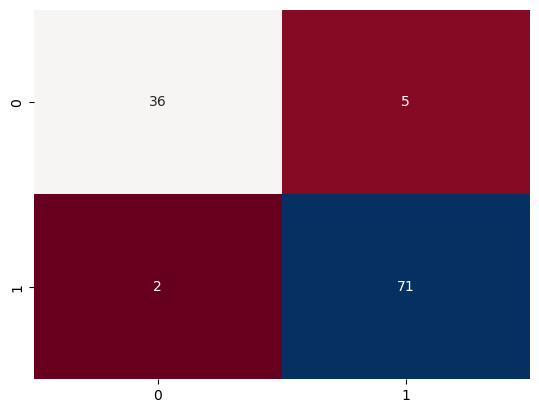

In [20]:
CM = confusion_matrix(y_val, y_pred)
sns.heatmap(CM, annot=True, fmt='g',cbar=False,cmap='RdBu')
CM